# Clean experimental data, numerical - experimental comparison

In [5]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from simmit import clean_data as cl
#import filter
import os

dir = os.path.dirname(os.path.realpath('__file__')) + "/"
pylab.rcParams['figure.figsize'] = (24.0,12.0)

In this notebook we will demonstrate how data can be filtered and interpolated so that a prescribed number of points can be further utilized as loading path for simulations

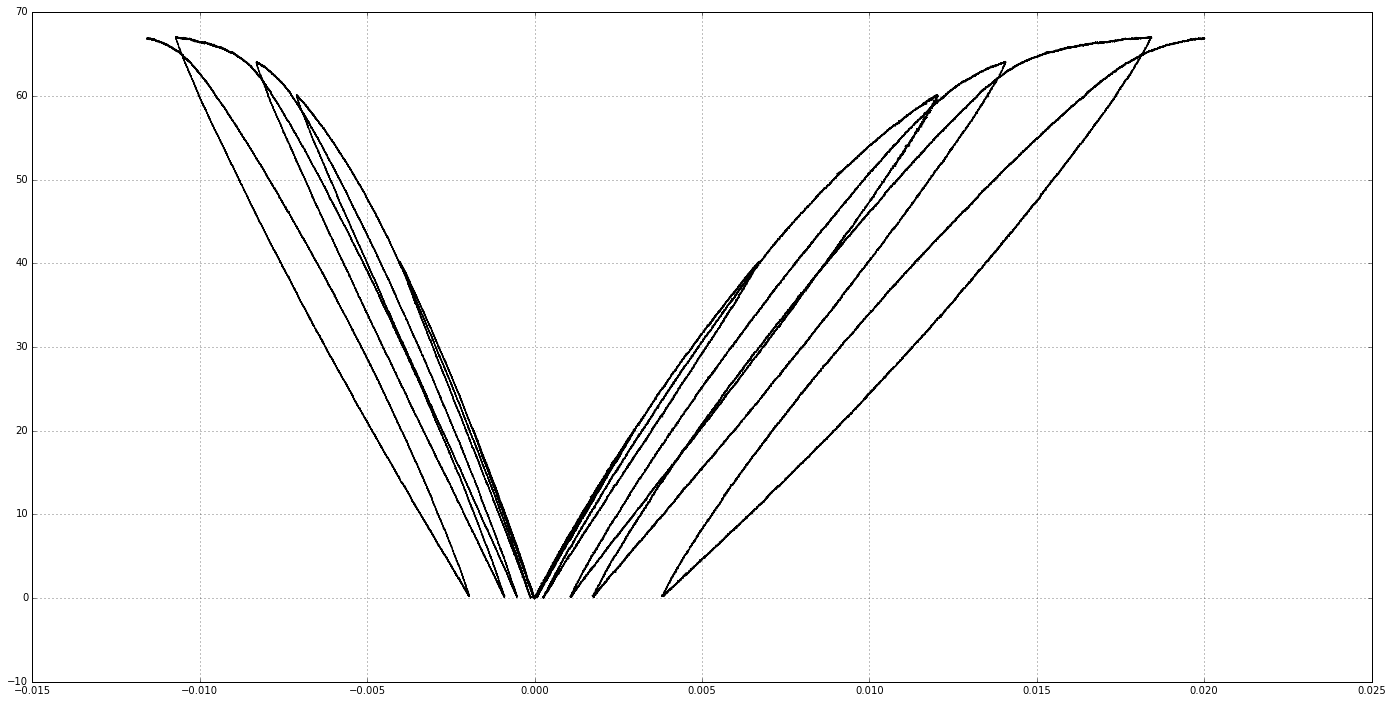

In [9]:
#This is the experimental input file
input_file = dir + "exp_raw_data/+-45/load_unload_1.txt"

#This is an output_file for the incremental loading and then a validation file with stress-strain response
output_file = dir + "path_inc.txt"
valid_file = dir +  "valid.txt"

#Structure of the input file : 
#Col 1 : Longitudinal strain
#Col 2 : Transverse strain
#Col 3 : Longitudinal stress (imposed)

#Let's load and plot the original file
E11, E22, S11 = np.loadtxt(input_file, usecols=(0,1,2), unpack=True)
fig = plt.figure()
plt.grid(True)
plt.plot(E11,S11, c='black')
plt.plot(E22,S11, c='black')
plt.show()

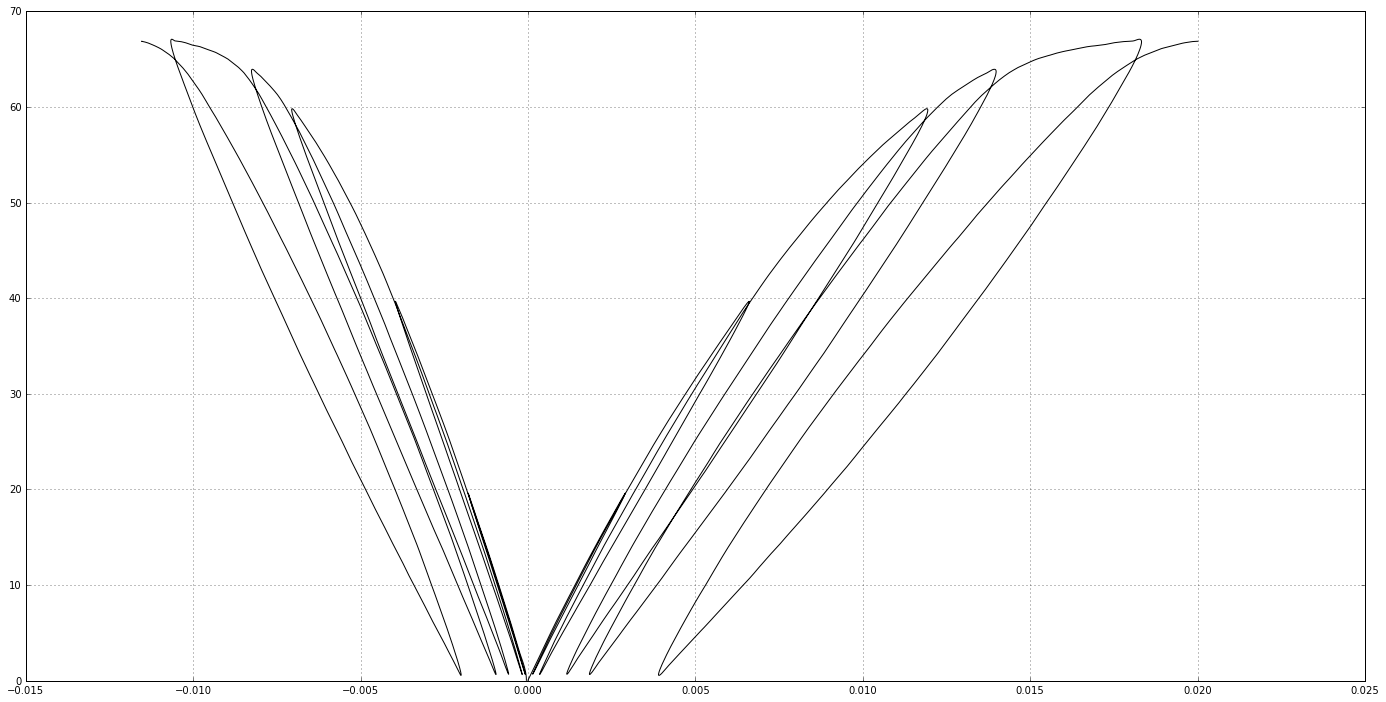

In [18]:
#Filtering the data
E11_hat = cl.savitzky_golay(E11, 501, 3)
E22_hat = cl.savitzky_golay(E22, 501, 3)
S11_hat = cl.savitzky_golay(S11, 501, 3)

#Let's load and plot the original file
fig = plt.figure()
plt.grid(True)
plt.plot(E11_hat,S11_hat, c='black')
plt.plot(E22_hat,S11_hat, c='black')
plt.show()


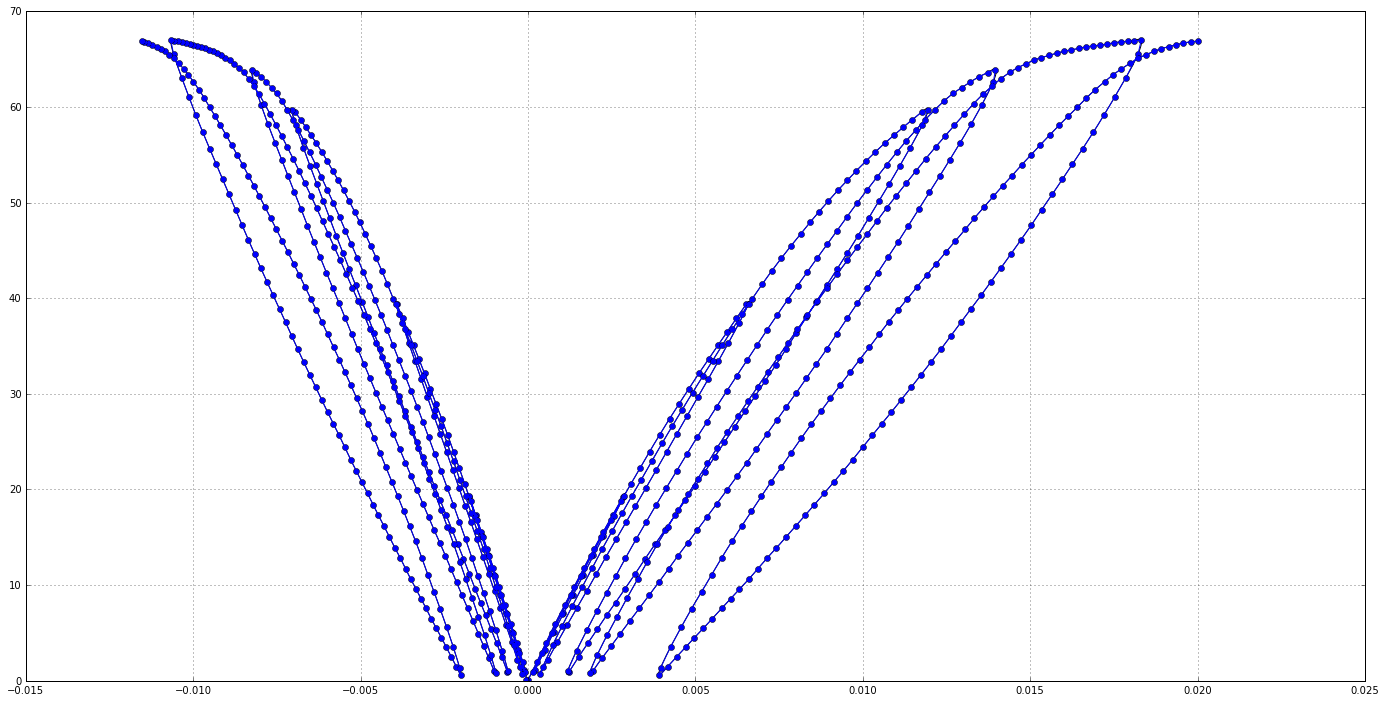

In [42]:
#And now we interpolate the data
size_int = 400

size = E11.size
time = np.linspace(0, 1, size)
time_int = np.linspace(0, 1, size_int)
n_int = np.linspace(1, size_int, size_int)

#We interpolate from time
f_E11 = interpolate.interp1d(time, E11_hat)
f_E22 = interpolate.interp1d(time, E22_hat)
f_S11 = interpolate.interp1d(time, S11_hat)

E11_int = f_E11(time_int)
E22_int = f_E22(time_int)
S11_int = f_S11(time_int)

n_int = np.linspace(1, size_int, size_int)

fig = plt.figure()
plt.grid(True)
plt.plot(E11_hat,S11_hat, c='black')
plt.plot(E22_hat,S11_hat, c='black')
plt.plot(E11_int,S11_int, 'bo')
plt.plot(E11_int,S11_int, 'b-')
plt.plot(E22_int,S11_int, 'bo')
plt.plot(E22_int,S11_int, 'b-')

#Structure of path_inc.txt
#Col 1 : Time
#Col 2 : Temperature
#Col 3 : Stress (imposed)


#np.savetxt(output_file, np.transpose([n_int,time_int, y_tot]), fmt='%1.8e')
#np.savetxt(valid_file, np.transpose([n_int,time_int,x_tot,x_tot2,y_tot]), fmt='%1.8e')